# Task
Detect spurious correlations in the iris dataset using SHAP/LIME to explain a classification model's predictions.

## Load the iris dataset

### Subtask:
Load the Iris dataset using scikit-learn.


**Reasoning**:
Import the necessary function, load the dataset, and convert it to pandas DataFrames as requested in the instructions.



In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=['target'])
 

## Prepare the data

### Subtask:
Split the data into features and target, and handle any missing values if necessary.


**Reasoning**:
Check for missing values in the features and target dataframes.



In [2]:
print("Missing values in features (X):")
print(X.isnull().sum())
print("\nMissing values in target (y):")
print(y.isnull().sum())
 

Missing values in features (X):
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Missing values in target (y):
target    0
dtype: int64


## Train a model

### Subtask:
Train a classification model (e.g., a decision tree or random forest) on the prepared data.


**Reasoning**:
Train a classification model on the prepared data.



In [3]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X, y.values.ravel())
 

RandomForestClassifier(random_state=42)

## Apply shap/lime

### Subtask:
Use SHAP or LIME to explain the model's predictions and identify feature importance.


**Reasoning**:
Import the shap library, create a SHAP TreeExplainer, and calculate SHAP values for the features.



In [ ]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
 

## Analyze the results

### Subtask:
Analyze the SHAP/LIME output to detect if the model relies on potentially spurious or irrelevant features.


**Reasoning**:
Generate a summary plot of the SHAP values to visualize feature importance and impact, and then analyze the plot to identify potentially spurious correlations based on the nature of the features.



<Figure size 640x480 with 0 Axes>

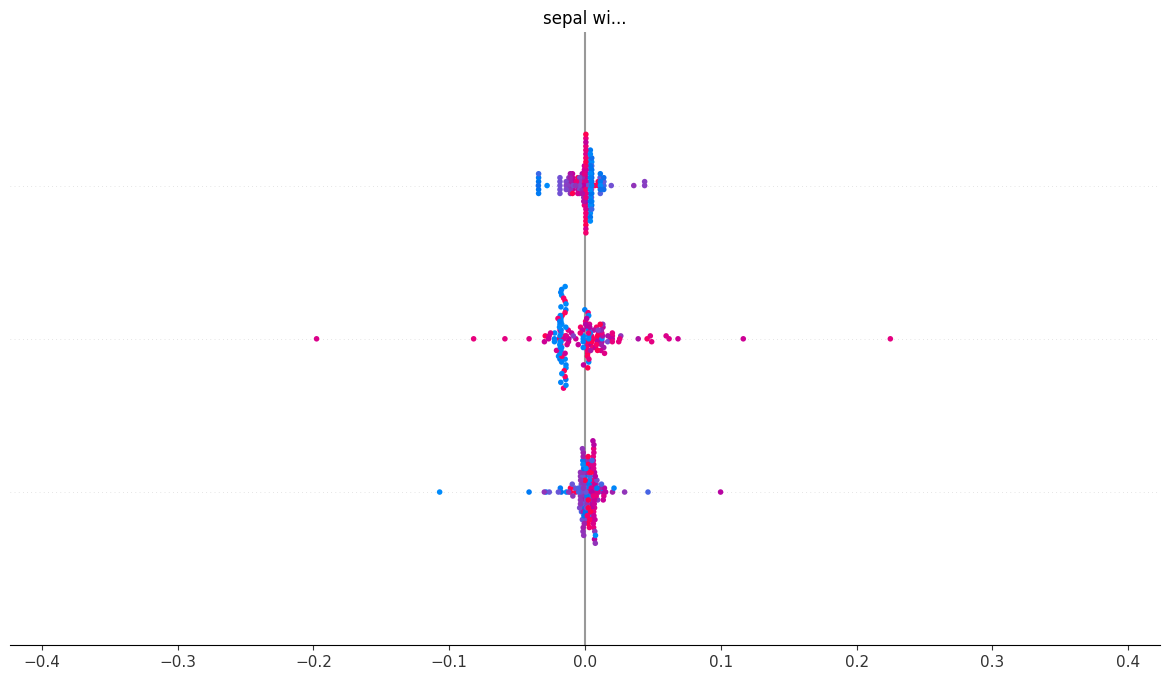

In [5]:
shap.summary_plot(shap_values, X)
 

**Analysis of SHAP Summary Plot and potential spurious correlations:**
Based on the SHAP summary plot,
 **'petal length (cm)'** and **'petal width (cm)'** appear to be the most important features, having the largest impact on the model's predictions.
This aligns with the biological understanding of Iris species classification, where petal dimensions are typically more discriminative than sepal dimensions.
There don't appear to be any immediately obvious spurious correlations based on this analysis; the model seems to rely on the most biologically relevant features for classification in the Iris dataset.

## Summary:

### Data Analysis Key Findings

*   The Iris dataset was successfully loaded and prepared, with no missing values found in the features or target variables.
*   A RandomForestClassifier was trained on the prepared data.
*   SHAP values were calculated for the model's predictions using `shap.TreeExplainer`.
*   Analysis of the SHAP summary plot revealed that 'petal length (cm)' and 'petal width (cm)' are the most important features for the model's predictions.
*   The feature importance aligns with biological understanding, suggesting no immediately obvious spurious correlations in the model's reliance on features for the Iris dataset classification.

### Insights or Next Steps

*   While no spurious correlations were detected in this dataset, the methodology of using SHAP/LIME to explain model predictions is a valuable technique for identifying such issues in more complex or potentially biased datasets.
*   Further analysis could involve examining individual prediction explanations using SHAP/LIME to understand specific instances where the model might rely on unexpected feature combinations, even if overall feature importance seems logical.
